<a href="https://colab.research.google.com/github/Kharga/Assignment/blob/main/Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aayush Kharga


Problem - 1: Perform a classification task with knn from scratch.

1. Load the Dataset:

In [ ]:
import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive to access the file
drive.mount('/content/drive')

# Step 2: Load the dataset (replace 'diabetes.csv' with the correct file path)
df = pd.read_csv('/content/drive/My Drive/diabetes.csv')

# Check the dataset
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------    

Handle Missing Data

In [ ]:
# Example: Impute missing values
df.fillna(df.median(), inplace=True)
print(df.isnull().sum())  # Confirm no missing values


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


Feature Engineering:

In [ ]:
# Separate features and target
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

# Train-test split
indices = np.arange(len(X))
np.random.shuffle(indices)

split = int(0.7 * len(X))
X_train, X_test = X[indices[:split]], X[indices[split:]]
y_train, y_test = y[indices[:split]], y[indices[split:]]


Implement KNN:

In [ ]:
import numpy as np

# Step 1: Euclidean Distance Function
def euclidean_distance(x1, x2):
    """
    Compute the Euclidean distance between two points x1 and x2.
    """
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Step 2: Get k nearest neighbors
def get_neighbors(X_train, y_train, test_instance, k):
    """
    Get the k nearest neighbors for a test instance.
    """
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], test_instance)
        distances.append((X_train[i], y_train[i], dist))

    # Sort neighbors by distance
    distances.sort(key=lambda x: x[2])

    # Select the k nearest neighbors
    neighbors = distances[:k]

    return neighbors

# Step 3: Predict the class for a single test instance
def predict_instance(X_train, y_train, test_instance, k):
    """
    Predict the class for a single test instance.
    """
    neighbors = get_neighbors(X_train, y_train, test_instance, k)

    # Get the most common class label (majority vote)
    output_values = [neighbor[1] for neighbor in neighbors]
    prediction = np.bincount(output_values).argmax()

    return prediction

# Step 4: Predict classes for all test samples
def predict_all(X_train, y_train, X_test, k):
    """
    Predict the class for each test sample.
    """
    predictions = []
    for test_instance in X_test:
        prediction = predict_instance(X_train, y_train, test_instance, k)
        predictions.append(prediction)

    return np.array(predictions)

# Step 5: Accuracy Calculation
def accuracy(y_test, y_pred):
    """
    Calculate the accuracy of the model by comparing predicted and true labels.
    """
    correct = np.sum(y_test == y_pred)
    return correct / len(y_test)

# Example Usage:

# Let's assume X_train, X_test, y_train, y_test are already defined as NumPy arrays.
# For example:
# X_train = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
# y_train = np.array([0, 1, 0, 1])
# X_test = np.array([[2, 3], [6, 7]])
# y_test = np.array([0, 1])

k = 5  # Number of nearest neighbors
y_pred = predict_all(X_train, y_train, X_test, k)
acc = accuracy(y_test, y_pred)

print(f"Accuracy with k={k}: {acc:.2f}")


Accuracy with k=5: 0.66


Problem - 2 - Experimentation:

Scaling the Feature Matrix and Training the kNN Classifier

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to get k nearest neighbors
def get_neighbors(X_train, y_train, test_instance, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], test_instance)
        distances.append((X_train[i], y_train[i], dist))

    distances.sort(key=lambda x: x[2])  # Sort by distance
    neighbors = distances[:k]  # Get the k nearest neighbors
    return neighbors

# Function to predict the class for a single test instance
def predict_instance(X_train, y_train, test_instance, k):
    neighbors = get_neighbors(X_train, y_train, test_instance, k)
    output_values = [neighbor[1] for neighbor in neighbors]
    prediction = np.bincount(output_values).argmax()  # Majority class
    return prediction

# Function to predict classes for all test samples
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for test_instance in X_test:
        prediction = predict_instance(X_train, y_train, test_instance, k)
        predictions.append(prediction)
    return np.array(predictions)

# Accuracy calculation function
def accuracy(y_test, y_pred):
    correct = np.sum(y_test == y_pred)
    return correct / len(y_test)

# 1. Prepare data: Let's assume X and y are already loaded
# Example: Assuming the dataset is ready
# X = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
# y = np.array([0, 1, 0, 1])

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Scaling the Features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 3. Train and Test the kNN Classifier on Scaled Data
k = 5
y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
acc_scaled = accuracy(y_test, y_pred_scaled)
print(f"Accuracy with scaled data and k={k}: {acc_scaled:.2f}")


Accuracy with scaled data and k=5: 0.69


Comparative Analysis

In [ ]:
# 4. Train and Test the kNN Classifier on Original Data
y_pred_original = predict_all(X_train, y_train, X_test, k)
acc_original = accuracy(y_test, y_pred_original)
print(f"Accuracy with original data and k={k}: {acc_original:.2f}")

# 5. Comparison and Discussion:
print(f"\nComparative Analysis:")
print(f"Accuracy (Original Data): {acc_original:.2f}")
print(f"Accuracy (Scaled Data): {acc_scaled:.2f}")

if acc_scaled > acc_original:
    print("Scaling improved the model's accuracy.")
elif acc_scaled < acc_original:
    print("Scaling decreased the model's accuracy.")
else:
    print("Scaling did not affect the accuracy.")


Accuracy with original data and k=5: 0.66

Comparative Analysis:
Accuracy (Original Data): 0.66
Accuracy (Scaled Data): 0.69
Scaling improved the model's accuracy.


Problem 3 - Experimentation with k

1. Vary the Number of Neighbors (k)

In [ ]:
import time
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
from google.colab import drive

# Step 1: Mount Google Drive to access the file
drive.mount('/content/drive')

# Step 2: Load the dataset (replace 'diabetes.csv' with the correct file path)
df = pd.read_csv('/content/drive/My Drive/diabetes.csv')
# Example, assuming 'Outcome' is the target column
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values


# Function to calculate Euclidean distance
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Function to get k nearest neighbors
def get_neighbors(X_train, y_train, test_instance, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(X_train[i], test_instance)
        distances.append((X_train[i], y_train[i], dist))

    distances.sort(key=lambda x: x[2])  # Sort by distance
    neighbors = distances[:k]  # Get the k nearest neighbors
    return neighbors

# Function to predict the class for a single test instance
def predict_instance(X_train, y_train, test_instance, k):
    neighbors = get_neighbors(X_train, y_train, test_instance, k)
    output_values = [neighbor[1] for neighbor in neighbors]
    prediction = np.bincount(output_values).argmax()  # Majority class
    return prediction

# Function to predict classes for all test samples
def predict_all(X_train, y_train, X_test, k):
    predictions = []
    for test_instance in X_test:
        prediction = predict_instance(X_train, y_train, test_instance, k)
        predictions.append(prediction)
    return np.array(predictions)

# Accuracy calculation function
def accuracy(y_test, y_pred):
    correct = np.sum(y_test == y_pred)
    return correct / len(y_test)

# Prepare data (assuming X and y are already loaded)
# Example:
# X = feature matrix (2D array), y = labels (1D array)

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize variables to store results
k_values = range(1, 16)
acc_original = []
acc_scaled = []
time_original = []
time_scaled = []

# Experiment with different k values
for k in k_values:
    # Measure time and accuracy for original data
    start_time = time.time()
    y_pred_original = predict_all(X_train, y_train, X_test, k)
    acc_original.append(accuracy(y_test, y_pred_original))
    time_original.append(time.time() - start_time)

    # Measure time and accuracy for scaled data
    start_time = time.time()
    y_pred_scaled = predict_all(X_train_scaled, y_train, X_test_scaled, k)
    acc_scaled.append(accuracy(y_test, y_pred_scaled))
    time_scaled.append(time.time() - start_time)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


2. Visualize the Results

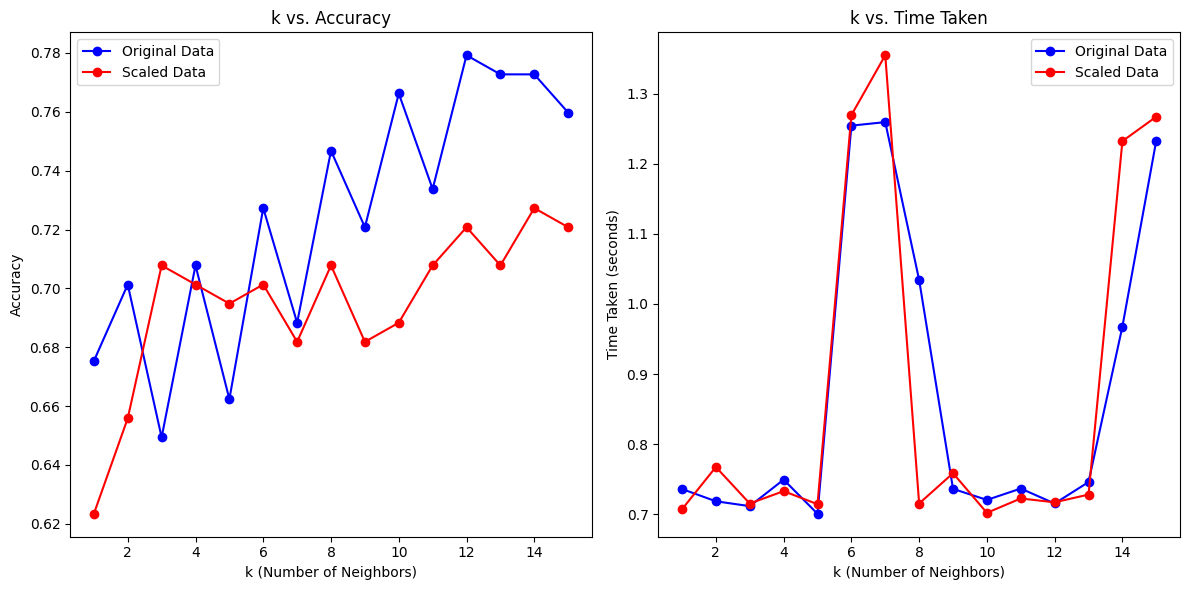

In [ ]:
import matplotlib.pyplot as plt

# 1. Accuracy vs k
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, acc_original, label='Original Data', color='blue', marker='o')
plt.plot(k_values, acc_scaled, label='Scaled Data', color='red', marker='o')
plt.title('k vs. Accuracy')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.legend()

# 2. Time Taken vs k
plt.subplot(1, 2, 2)
plt.plot(k_values, time_original, label='Original Data', color='blue', marker='o')
plt.plot(k_values, time_scaled, label='Scaled Data', color='red', marker='o')
plt.title('k vs. Time Taken')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time Taken (seconds)')
plt.legend()

plt.tight_layout()
plt.show()



3. Analyze and Discuss
Choice of k:

Small
𝑘
k can lead to overfitting (high variance, low bias).
Large
𝑘
k can lead to underfitting (low variance, high bias).
The optimal
𝑘
k balances bias and variance, maximizing accuracy.
Computational Cost:

Larger
𝑘
k increases the computational cost due to more distance calculations.
Scaling the dataset often results in faster convergence and improved accuracy.
Optimal
𝑘
k:

Based on the plots, determine the
𝑘
k value with the highest accuracy and acceptable computational cost.

Problem - 4 - Additional Questions {Optional - But Highly Recommended}:

• Discuss the challenges of using KNN for large datasets and high-dimensional data.

In [ ]:
Challenges of Using KNN for Large Datasets and High-Dimensional Data
1. Challenges with Large Datasets:
High Memory Usage:
KNN is a lazy learning algorithm that stores the entire training dataset in memory. For large datasets, this can lead to memory inefficiencies.
Slow Prediction Time:
To predict a label for a new instance, KNN computes distances to all training instances. This leads to high computational overhead, especially for large datasets.
Inefficient Scaling:
As the dataset grows, the prediction time scales linearly, making it unsuitable for real-time applications.
2. Challenges with High-Dimensional Data:
Curse of Dimensionality:

In high-dimensional spaces, distances between points tend to become similar, making it difficult to distinguish between neighbors.
The increased sparsity of data in high dimensions degrades the performance of distance-based algorithms like KNN.
Increased Computation:

High-dimensional data requires more computations for distance calculations, further increasing prediction time.
Overfitting Risks:

High-dimensional data can introduce irrelevant or noisy features, which may lead to overfitting unless proper feature selection is applied.

Strategies to Improve the Efficiency of KNN
1. Approximate Nearest Neighbors (ANN) Algorithms:
KD-Tree and Ball-Tree:
Use hierarchical partitioning to reduce the number of distance computations.
Efficient for datasets with moderate dimensionality (e.g., less than 20 dimensions).
Locality-Sensitive Hashing (LSH):
Reduces search time by hashing points in a way that similar points fall into the same bucket with high probability.
Ideal for high-dimensional data.
2. Dimensionality Reduction:
Principal Component Analysis (PCA):

Reduces the number of features by projecting data into lower-dimensional space while retaining most of the variance.
t-SNE or UMAP:

Effective for reducing dimensions while preserving local structure, particularly for visualization and clustering.
Feature Selection:

Use statistical tests, recursive feature elimination, or L1 regularization to select the most important features and discard irrelevant ones.
3. Efficient Distance Metrics:
Manhattan Distance:
In certain cases, this can be computationally cheaper than Euclidean distance.
Hamming Distance:
Useful for categorical or binary data.
4. Clustering-Based Preprocessing:
Apply clustering algorithms (e.g., K-Means) to reduce the dataset size by summarizing groups of similar points. Use cluster centroids as proxies for individual points.
5. Use of Data Structures:
VP-Trees and Cover Trees:
Optimized data structures for efficient nearest-neighbor search in high-dimensional spaces.
6. Parallelization:
Distributed Computing:
Implement KNN in parallel using frameworks like Apache Spark or Dask to handle large datasets efficiently.
GPU Acceleration:
Use GPU-based implementations (e.g., RAPIDS cuML) to speed up distance computations.
7. Hybrid Methods:
Combine KNN with other models, such as decision trees or SVMs, to preprocess data or reduce dimensionality before applying KNN.